# **1. Collecte et Compréhension des Données**




In [12]:
# Importation des librairies Python
import pandas as pd # POUR MANIPULER LES DONNEES
import matplotlib.pyplot as plt # POUR VISUALISER
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import seaborn as sns# POUR VISUALISER LA HEATMAP
import numpy as np # POUR DES OPERATIONS SUR LES DONNEES
import psycopg2 # POUR LA PARTIE POSTGRESQL
from psycopg2 import sql

In [13]:
# Collecte des Données d'un fichier CSV dans un dataframe
df_forestfires = pd.read_csv('forestfires.csv')

In [14]:
# Les 5 premières lignes
df_forestfires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [15]:
# Informations générales des champs et des enregistrements
df_forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


**X** (Numérique , valeurs : 1 à 9) et **Y** (Numérique, valeurs : 2 à 9)

Coordonnées spatiales d'un point spécifique indiquant l'emplacement approximatif où un incendie de forêt a été observé.


---



**Month** (Catégorielle, valeurs : "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")


---


**day** (Catégorielle, valeurs :  "Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun")



---


**FFMC = Fine Fuel Moisture Code**(Numérique, valeurs : 18.7 à 96.20)

Indice du système Fire Weather Index (FWI).

Teneur en humidité des petits combustibles forestiers (feuilles mortes, herbes sèches).

Plus la valeur est élevée, plus les petits combustibles sont secs et facilement inflammables.


---


**DMC = Duff Moisture Code** (Numérique, valeurs : 1.1 à 291.3) Indice du système FWI.

 Teneur en humidité des couches organiques de profondeur intermédiaire (duff layer) du sol forestier.


---


**DC = Duff Code** (Numérique, valeurs : 7.9 à 860.6) Indice du système FWI.

Teneur en humidité des couches organiques profondes du sol forestier (humus).


---


**ISI = Initial Spread Index** (Numérique, valeurs : 0.0 à 56.10)Indice du système FWI 

Effets du vent et du FFMC pour estimer la vitesse de propagation initiale du feu.

---

**temp** (Numérique, valeurs : 2.2 à 33.30)

La température de l'air ambiant en degrés Celsius au moment de l'incendie.

---

**RH** (Numérique, valeurs : 15 à 100) : humidité relative de l'air en %

---

**wind** (Numérique, valeurs : 0.40 à 9.40) vitesse vent en km/h au moment du feu

---

**rain** (Numérique, valeurs : 0.0 à 6.4) quantité de précipitations en mm/mcarré.

---

**area** (Numérique, valeurs : 0.00 à 1090.84)Surface brûlée en ha

In [16]:
# Statistiques descriptives
print(df_forestfires.describe())

                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.791653    0.295959    63.655

# **2.  Alimentation, Nettoyage et Traitement des données**




In [17]:
#  Gestion des valeurs manquantes
df_forestfires.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [18]:
# gestion des doublons
df_forestfires.duplicated().sum()

4

In [19]:
print(f"Nombre de lignes avant suppression des doublons : {len(df_forestfires)}")

# Suppression des doublons
df_forestfires.drop_duplicates(inplace=True) 
# le inplace à True permet de modifier dans le df et de ne pas créer un nv df

print(f"Nombre de lignes après suppression des doublons : {len(df_forestfires)}")

Nombre de lignes avant suppression des doublons : 517
Nombre de lignes après suppression des doublons : 513


In [20]:
# Gestion des valeurs catégorielles
print(df_forestfires['month'].unique(),"\n",df_forestfires['month'].nunique()," valeurs uniques")
print(df_forestfires['day'].unique(),"\n ", df_forestfires['day'].nunique()," valeurs uniques")


['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov'] 
 12  valeurs uniques
['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu'] 
  7  valeurs uniques


In [21]:
# Ajout de la colonne area en km²
df_forestfires['area_km2'] = df_forestfires['area'] * 0.01

# suppresion de la colonne area
df_forestfires.drop(columns=['area'], inplace=True)
df_forestfires.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area_km2
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [22]:
# Transformation des valeurs catégorielles en valeurs numériques (janvier = 1, février = 2,...)
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
df_forestfires['month_num'] = df_forestfires['month'].map(month_mapping)
df_forestfires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area_km2,month_num
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,3
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,3
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,3


In [23]:
#Création de la colonne season pour gérer les saisons
def definir_saison(month):
    if month in [12, 1, 2]:
        return 'hiver'
    elif month in [3, 4, 5]:
        return 'printemps'
    elif month in [6, 7, 8]:
        return 'été'
    else:
        return 'automne'

df_forestfires['season'] = df_forestfires['month_num'].apply(definir_saison)
df_forestfires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area_km2,month_num,season
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,3,printemps
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10,automne
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10,automne
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,3,printemps
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,3,printemps


# **3. Analyse et Visualisation des données**

## 3.1) Distribution mensuelle de la surface brûlée





C:\Users\dbrim\AppData\Local\Temp\ipykernel_3232\3045220459.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_area = df_forestfires.groupby('month')['area_km2'].sum()


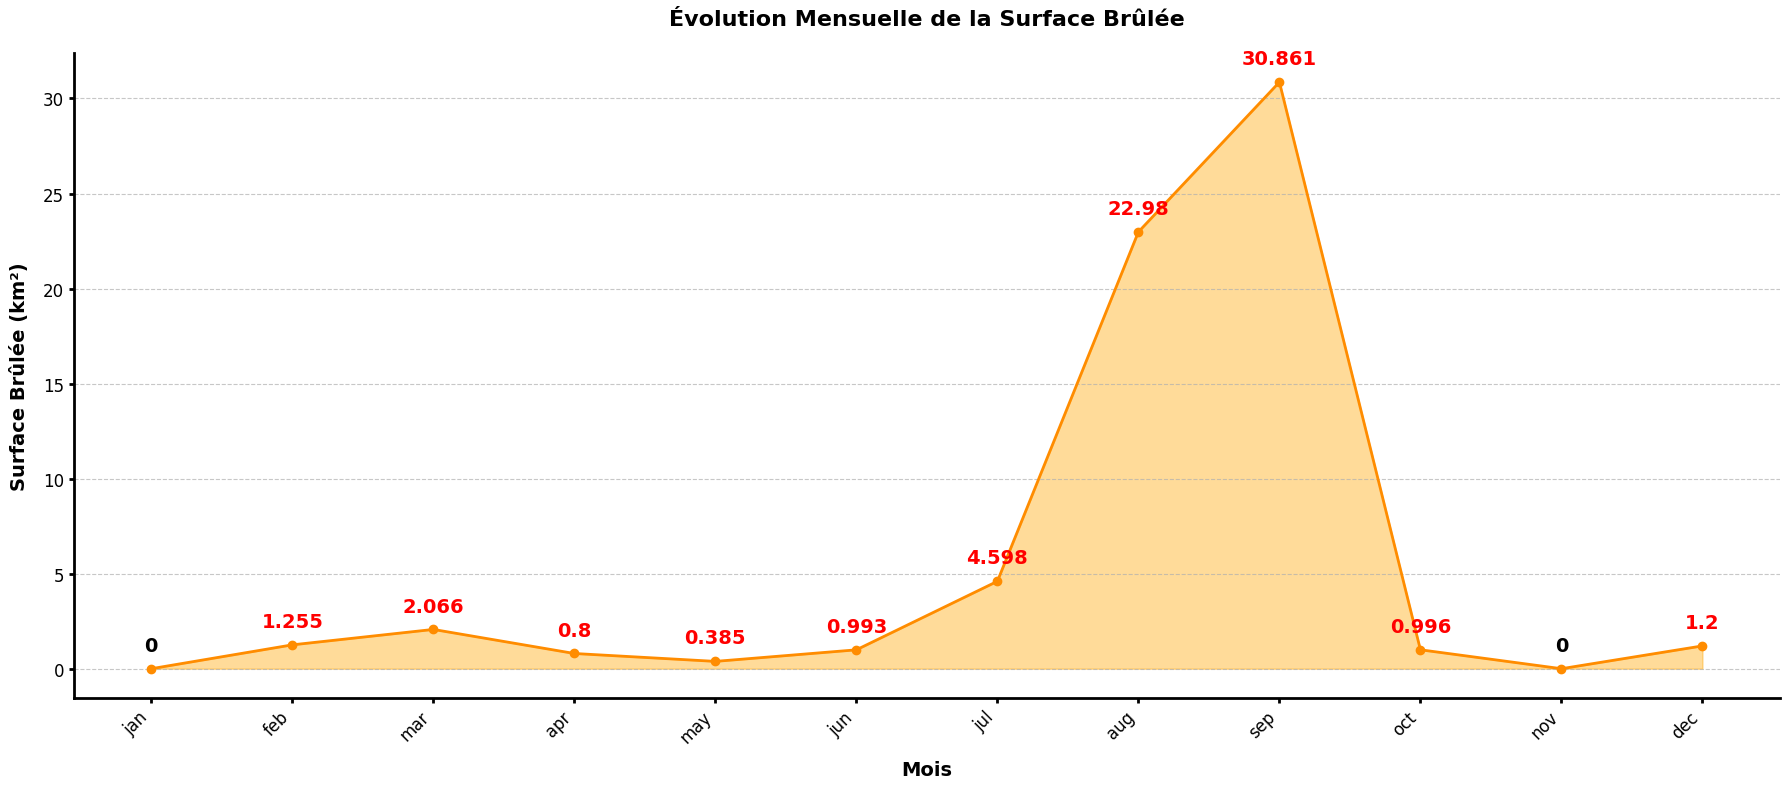

In [24]:
# Liste des mois dans l'ordre chronologique
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Convertir la colonne 'month' en type catégoriel avec l'ordre spécifié
df_forestfires['month'] = pd.Categorical(df_forestfires['month'], categories=month_order, ordered=True)

# Grouper par mois et calculer la somme de la surface brûlée
monthly_area = df_forestfires.groupby('month')['area_km2'].sum()

# Configuration du style
plt.figure(figsize=(18, 8))

# Création du graphique en aires
plt.fill_between(monthly_area.index, monthly_area.values, color='orange', alpha=0.4)  # Remplissage
plt.plot(monthly_area.index, monthly_area.values, marker='o', color='darkorange', linewidth=2)  # Ligne

# Ajouter des labels et un titre
plt.title('Évolution Mensuelle de la Surface Brûlée', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Mois', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Surface Brûlée (km²)', fontsize=14,fontweight='bold', labelpad=10)

# Ajuster l'axe X
plt.xticks(rotation=45, ha='right')

# Ajouter une grille
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les valeurs au-dessus de chaque point
for month, area in zip(monthly_area.index, monthly_area.values):
    text_color = 'red' if area > 0 else 'black'
    plt.annotate(
        f"{round(area, 3)}" if area > 0 else f"{int(round(area))}" ,
        xy=(month, area),  # Position du point
        xytext=(0, 10),  # Décalage du texte par rapport au point
        textcoords='offset points',  # Type de coordonnées pour xytext
        ha='center',  # Alignement horizontal du texte
        va='bottom',  # Alignement vertical du texte
        fontsize=14,
        fontweight='bold',# Taille de la police
        color=text_color  # Couleur du texte
    )

# Exporter le graphique
plt.savefig('distribution_mensuelle_surface_brulée.png', dpi=300, bbox_inches='tight')

# Récupérer les axes actuels
ax = plt.gca()

# Désactiver les bordures supérieures et droites
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Activer et colorer en noir les axes X et Y
ax.spines['left'].set_visible(True)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(2)

ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(2)

# Personnaliser les ticks pour plus de lisibilité
ax.tick_params(axis='x', colors='black', width=2, labelsize=12)
ax.tick_params(axis='y', colors='black', width=2, labelsize=12)

# Afficher le graphique
plt.tight_layout()
plt.show()



**Interprétation**

Septembre a la plus grande surface brulée, avec environ 31 km².

Août a la deuxième plus grande surface brulée, avec environ 23 km².

Juillet a environ 5 km² et mars, environ 2 km².

La plupart des autres mois ont une surface brulée d'environ 0 à 1 km²

Pas d'incendie en janvier et mai.


## 3.2) Analyse des saisons avec la fréquence d'incendies



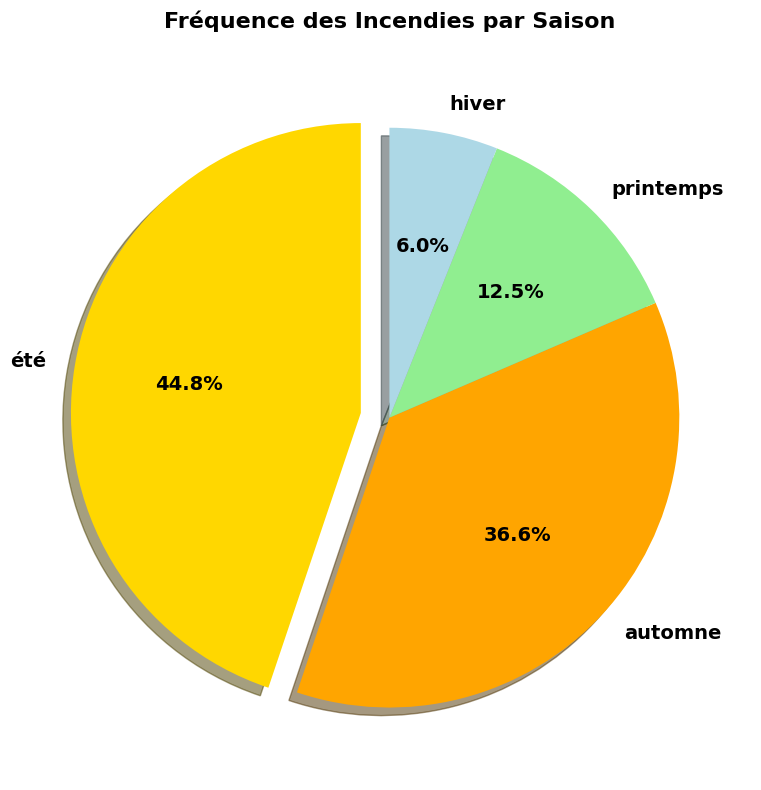

In [25]:
# Compter les incendies par saison
season_counts = df_forestfires['season'].value_counts()

# Définir les couleurs pour chaque saison
colors = ['gold', 'orange', 'lightgreen', 'lightblue']

# Exploser la partie correspondant à la saison avec le plus d'incendies
explode = (0.1, 0, 0, 0)  # Exploser la première part (saison avec le plus d'incendies)

# Configuration du graphique
plt.figure(figsize=(8, 8))  # Taille du graphique

# Créer le camembert
plt.pie(
    season_counts,
    labels=season_counts.index,  # Labels des saisons
    autopct='%1.1f%%',  # Pourcentage affiché avec 1 décimale
    startangle=90,  # Commencer à 90° pour une meilleure disposition
    colors=colors,  # Couleurs des parts
    explode=explode,  # Exploser une part
    shadow=True,  # Ajouter une ombre
    textprops={'fontsize': 14, 'fontweight': 'bold'}  # Taille de la police des labels
)

# Titre
plt.title('Fréquence des Incendies par Saison', fontsize=16, fontweight='bold', pad=20)

# Sauvegarder le graphique au format SVG
plt.savefig('frequence_incendies_saison.png', dpi=300, bbox_inches='tight')

# Afficher le graphique
plt.tight_layout()
plt.show()

**Interprétation**

Ce diagramme circulaire montre la fréquence des incendies selon les saisons.

Il indique clairement que la majorité des incendies se produisent en été (44,8%).

L'automne suit avec une proportion significative (36,6%).

Le printemps représente 12,5% des incendies, tandis que l'hiver enregistre la plus faible fréquence, avec seulement 6%.

Le graphique met en évidence une corrélation forte entre la saison estivale et le risque d'incendie




## 3.3) Analyse des régions les plus touchées



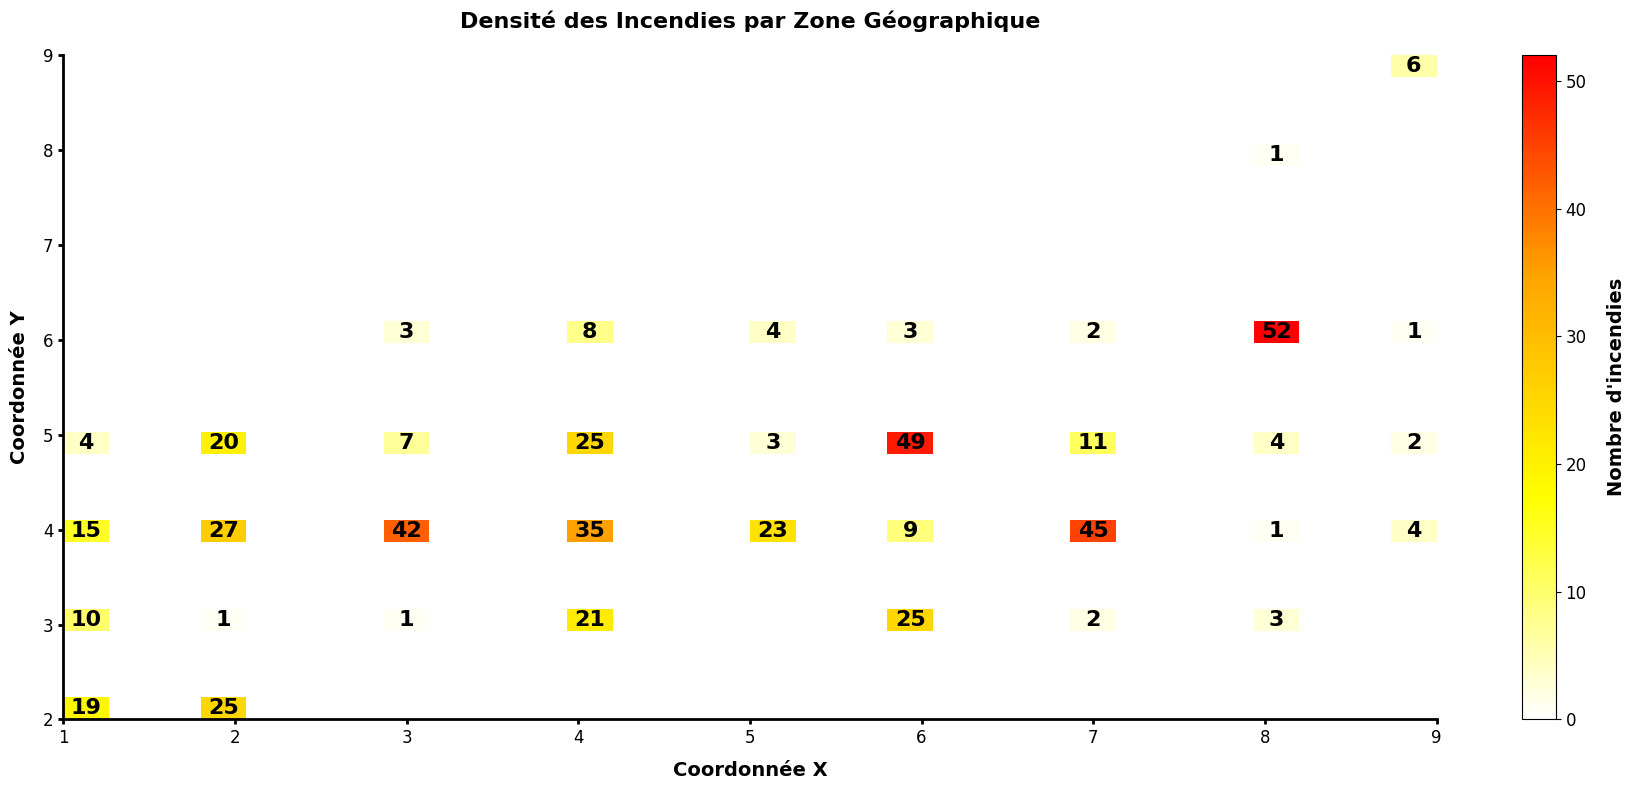

In [26]:
# Configuration du graphique
plt.figure(figsize=(18, 8))
# Création d'une palette de couleurs personnalisée
cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "yellow", "orange", "red"])
# Création du graphique hist2d
counts, xedges, yedges, im = plt.hist2d(
    df_forestfires['X'], df_forestfires['Y'],
    bins=30,  # Nombre de bins (carrés) sur les axes X et Y
    cmap=cmap # Palette de couleurs
)

# Barre de couleur
cbar = plt.colorbar(im, label='Nombre d\'incendies')
cbar.ax.tick_params(labelsize=12)  # Taille des labels de la barre de couleur
# Décaler le titre de la barre de couleur et le mettre en gras
cbar.set_label('Nombre d\'incendies', fontsize=14, fontweight='bold', labelpad=15)

# Titre et labels
plt.title('Densité des Incendies par Zone Géographique', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Coordonnée X', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Coordonnée Y', fontsize=14, fontweight='bold', labelpad=10)

# Ajouter des annotations pour les carrés les plus denses
for i in range(len(xedges) - 1):
    for j in range(len(yedges) - 1):
        if counts[i, j] > 0:  # Annoter uniquement les carrés avec des données
            plt.annotate(
                f"{int(counts[i, j])}",  # Texte à afficher
                (xedges[i] + (xedges[i + 1] - xedges[i]) / 2, yedges[j] + (yedges[j + 1] - yedges[j]) / 2),  # Centre du carré
                ha='center', va='center',  # Alignement du texte
                fontsize=16,  # Taille de la police
                fontweight='bold',  # Texte en gras
                color='black' if counts[i, j] > np.median(counts) else 'black',  # Couleur du texte

            )

# Sauvegarder le graphique avant de l'afficher
plt.savefig('densite_incendies_zone_geographique.png', dpi=300, bbox_inches='tight')

# Récupérer les axes actuels
ax = plt.gca()

# Désactiver les bordures supérieures et droites
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Activer et colorer en noir les axes X et Y
ax.spines['left'].set_visible(True)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(2)

ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(2)

# Personnaliser les ticks pour plus de lisibilité
ax.tick_params(axis='x', colors='black', width=2, labelsize=12)
ax.tick_params(axis='y', colors='black', width=2, labelsize=12)

# Afficher le graphique
plt.tight_layout()
plt.show()

**Interprétation**

Les résultats suggèrent que la répartition des incendies est aléatoire et non corrélée aux coordonnées géographiques.

La variabilité des tailles des incendies sur cette grille géographique a une tendance à des incendies de taille petite à moyenne.

Les incendies de plus grande taille sont moins courants, un d'environ 10 km² à (6, 5) et un autre  à (8, 6) avec une aire d'environ 6 km².


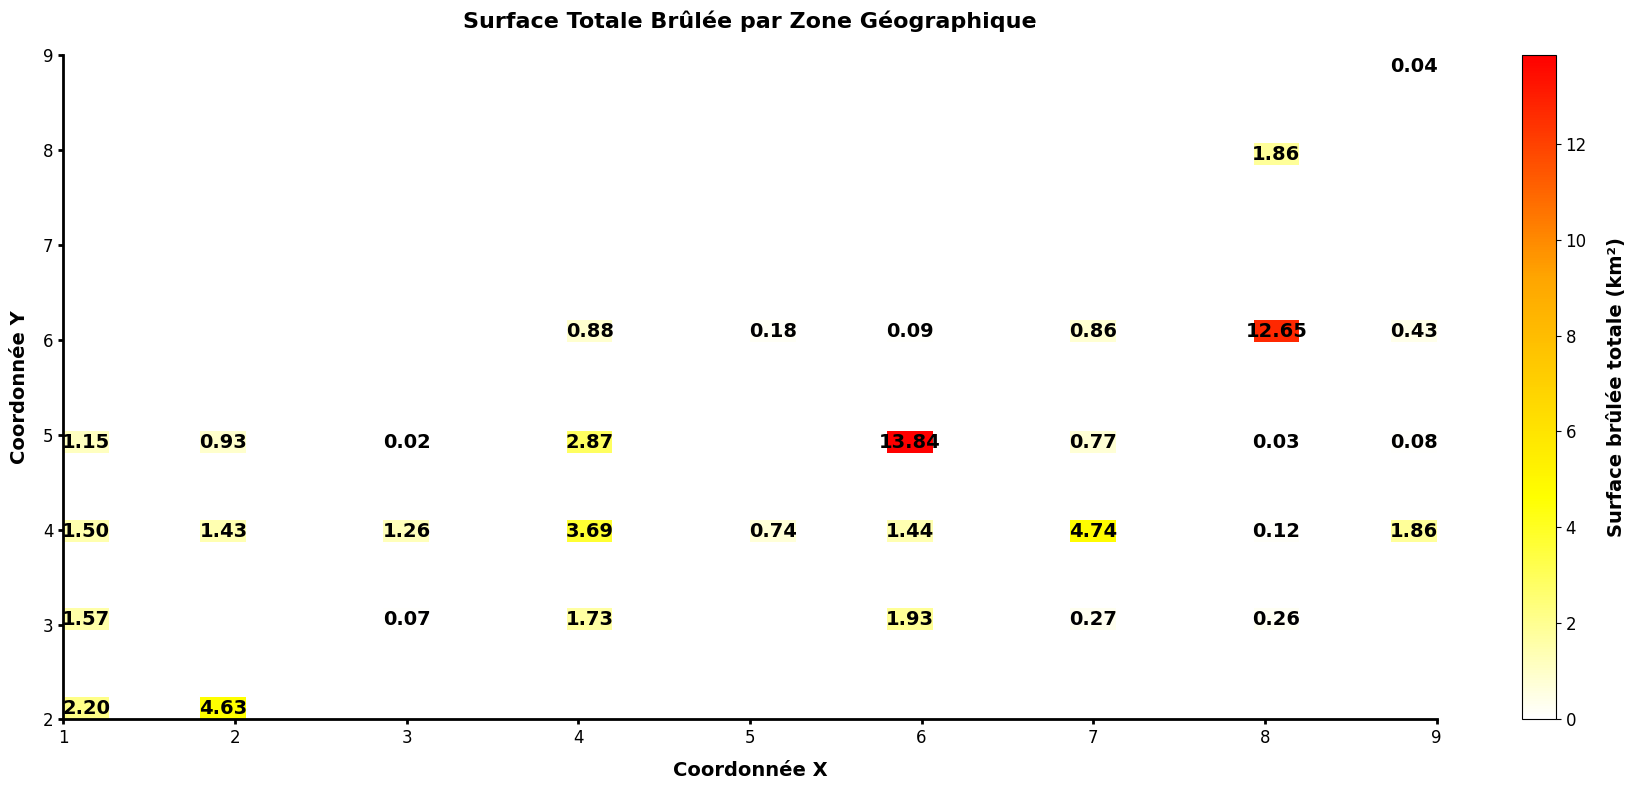

In [27]:
# Configuration du graphique
plt.figure(figsize=(18, 8))

# Création d'une palette de couleurs personnalisée
cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "yellow", "orange", "red"])

# Calculer la somme de la surface brûlée par zone géographique avec numpy.histogram2d
somme_surface, xedges, yedges = np.histogram2d(
    df_forestfires['X'], df_forestfires['Y'],
    bins=30,
    weights=df_forestfires['area_km2']
)

# Afficher les résultats avec imshow pour une meilleure maîtrise du rendu visuel
im = plt.imshow(
    somme_surface.T,  # Transposée nécessaire pour le bon affichage
    origin='lower',
    cmap=cmap,
    interpolation='nearest',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    aspect='auto'
)

# Barre de couleur
cbar = plt.colorbar(im)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Surface brûlée totale (km²)', fontsize=14, fontweight='bold', labelpad=15)

# Titre et labels
plt.title('Surface Totale Brûlée par Zone Géographique', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Coordonnée X', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Coordonnée Y', fontsize=14, fontweight='bold', labelpad=10)

# Ajouter des annotations pour les carrés avec surface brûlée > 0
for i in range(len(xedges) - 1):
    for j in range(len(yedges) - 1):
        if somme_surface[i, j] > 0:
            plt.annotate(
                f"{somme_surface[i, j]:.2f}",  # Surface brûlée totale avec 2 décimales
                (xedges[i] + (xedges[i + 1] - xedges[i]) / 2,
                 yedges[j] + (yedges[j + 1] - yedges[j]) / 2),
                ha='center', va='center',
                fontsize=14,
                fontweight='bold',
                color='black'
            )

# Récupérer les axes actuels
ax = plt.gca()

# Désactiver les bordures supérieures et droites
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Activer et colorer en noir les axes X et Y
ax.spines['left'].set_visible(True)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(2)

ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(2)

# Optionnel : Personnaliser les ticks pour plus de lisibilité
ax.tick_params(axis='x', colors='black', width=2, labelsize=12)
ax.tick_params(axis='y', colors='black', width=2, labelsize=12)

# Ajustement automatique des marges
plt.tight_layout()

# Sauvegarder le graphique
plt.savefig('surface_totale_brulee_zone_geographique.png', dpi=300, bbox_inches='tight')

# Afficher le graphique
plt.show()

## 3.4) Quantité maximale de pluie enregistrée et date correspondante



In [28]:
# Filtrer seulement les jours avec pluie (> 0)
df_pluie = df_forestfires[df_forestfires['rain'] > 0].copy()

# Afficher les jours de pluie
jours_de_pluie = df_pluie[['month', 'day', 'rain']]
print(jours_de_pluie)

# Calculer le nombre exact de jours de pluie
nombre_jours_pluie = df_pluie.shape[0]
print(f"\nNombre total de jours de pluie : {nombre_jours_pluie}")

# Identifier le jour avec la pluie maximale
max_rain_value = df_pluie['rain'].max()
max_rain_row = df_pluie.loc[df_pluie['rain'].idxmax()]
print(f"\nJour avec la pluie maximale : {max_rain_row['month']} {max_rain_row['day']} avec {max_rain_value} mm de pluie")

    month  day  rain
3     mar  fri   0.2
243   aug  sun   1.0
286   jul  wed   0.2
499   aug  tue   6.4
500   aug  tue   0.8
501   aug  tue   0.8
502   aug  tue   0.4
509   aug  fri   1.4

Nombre total de jours de pluie : 8

Jour avec la pluie maximale : aug tue avec 6.4 mm de pluie


C:\Users\dbrim\AppData\Local\Temp\ipykernel_3232\455289081.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_pluie['occurrences'] = df_pluie.groupby(['mois', 'rain'])['rain'].transform('count')


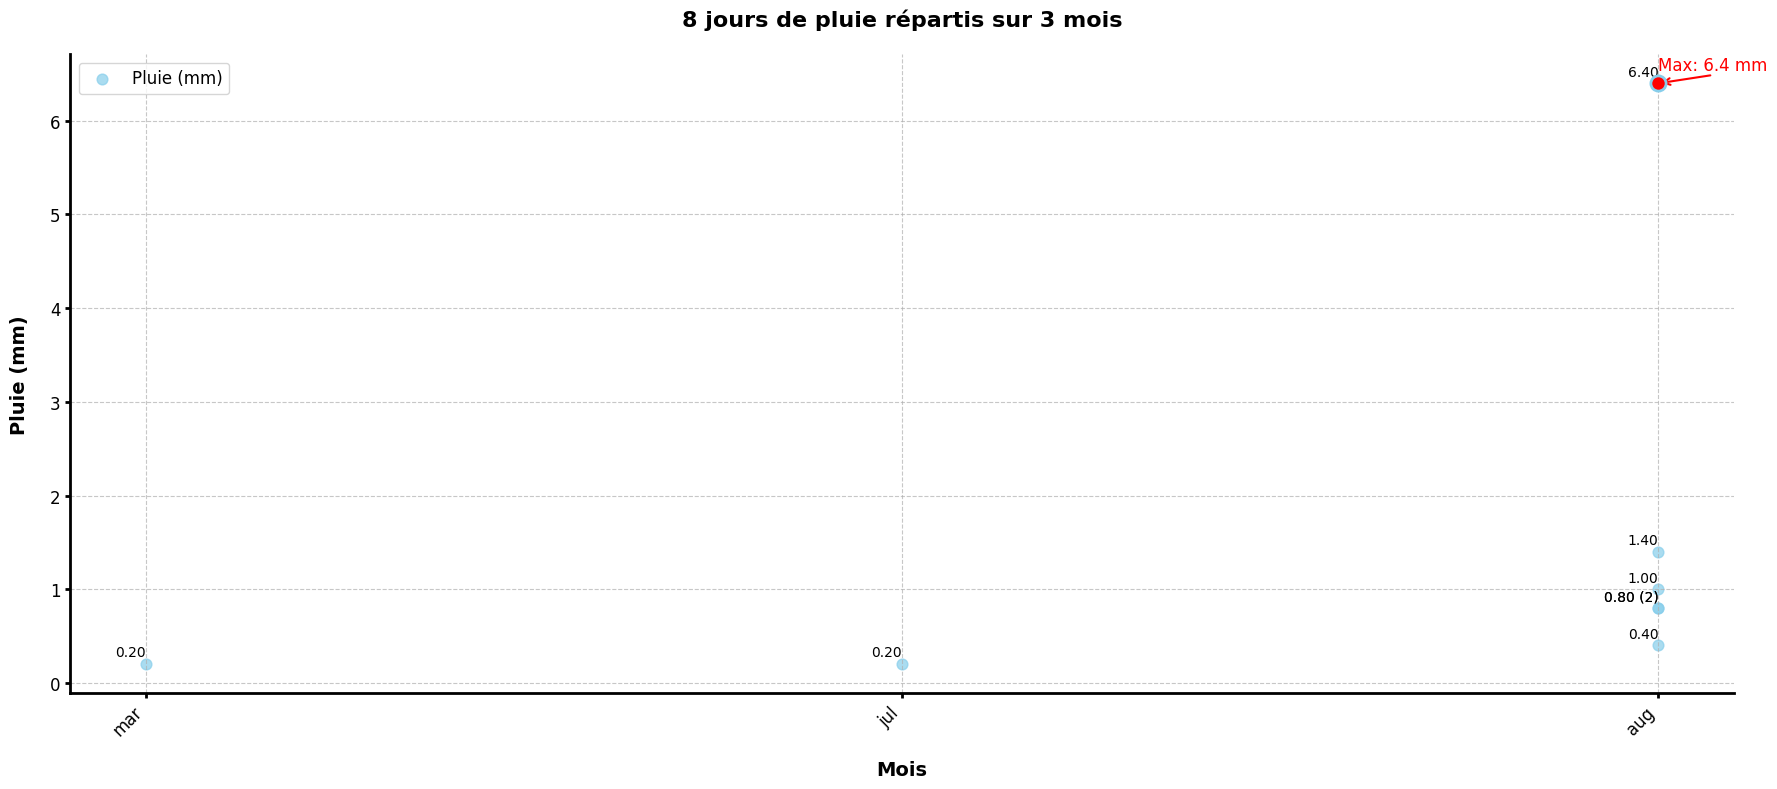

In [29]:


# Créer une colonne combinant jour et mois pour des étiquettes claires sur l'axe X
df_pluie['mois'] = df_pluie['month'].astype(str)

# Ordonner les mois selon l'ordre chronologique
df_pluie['mois'] = pd.Categorical(df_pluie['mois'], categories=month_order, ordered=True)
df_pluie.sort_values('mois', inplace=True)

# Calculer nombre exact de jours et mois distincts de pluie
nombre_jours_pluie = df_pluie.shape[0]
nombre_mois_pluie = df_pluie['mois'].nunique()

# Identifier le jour avec la pluie maximale
max_rain_value = df_pluie['rain'].max()
max_rain_row = df_pluie.loc[df_pluie['rain'].idxmax()]

# Compter les occurrences de chaque valeur de pluie par mois
df_pluie['occurrences'] = df_pluie.groupby(['mois', 'rain'])['rain'].transform('count')

# Configuration du graphique
plt.figure(figsize=(18, 8))

# Graphique avec uniquement les points
plt.scatter(
    df_pluie['mois'], df_pluie['rain'],
    color='skyblue',
    s=60,
    alpha=0.7,
    label='Pluie (mm)'
)

# Mettre en évidence le jour avec la pluie maximale
plt.scatter(
    max_rain_row['mois'], max_rain_value,
    color='red',
    s=120,
    edgecolor='skyblue',
    linewidth=2,
    zorder=5
)

# Annoter chaque point avec pluie > 0.2 mm
for idx, row in df_pluie.iterrows():
    if row['rain'] >= 0.2:
        if row['occurrences'] > 1:
            annotation = f'{row["rain"]:.2f} ({row["occurrences"]})'
        else:
            annotation = f'{row["rain"]:.2f}'
        plt.text(row['mois'], row['rain'] + 0.05, annotation, fontsize=10, ha='right', va='bottom')

# Annotation spécifique pour le maximum
plt.annotate(
    f'Max: {max_rain_value} mm\n',
    xy=(max_rain_row['mois'], max_rain_value),
    xytext=(0, 20),
    textcoords='offset points',
    fontsize=12,
    color='red',
    ha='left',
    va='top',
    arrowprops=dict(arrowstyle='->', color='red', linewidth=1.5)
)

# Titres et labels (avec mois ajouté au titre)
plt.title(f'{nombre_jours_pluie} jours de pluie répartis sur {nombre_mois_pluie} mois',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Mois', fontsize=14, fontweight='bold', labelpad=15)
plt.ylabel('Pluie (mm)', fontsize=14, fontweight='bold', labelpad=15)

# Personnalisation visuelle
plt.xticks(rotation=45, ha='right')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(axis='x', colors='black', width=2, labelsize=12)
ax.tick_params(axis='y', colors='black', width=2, labelsize=12)

# Ajustement automatique des marges
plt.tight_layout()

# Sauvegarder l'image
plt.savefig('jours_pluie_seulement.png', dpi=300, bbox_inches='tight')

# Afficher le graphique
plt.show()

**Interprétation**

Le jour le plus pluvieux est en août avec 6.4 mm de précipitations.


## 3.5) Corrélation entre les facteurs météorologiques et la superficie brûlée



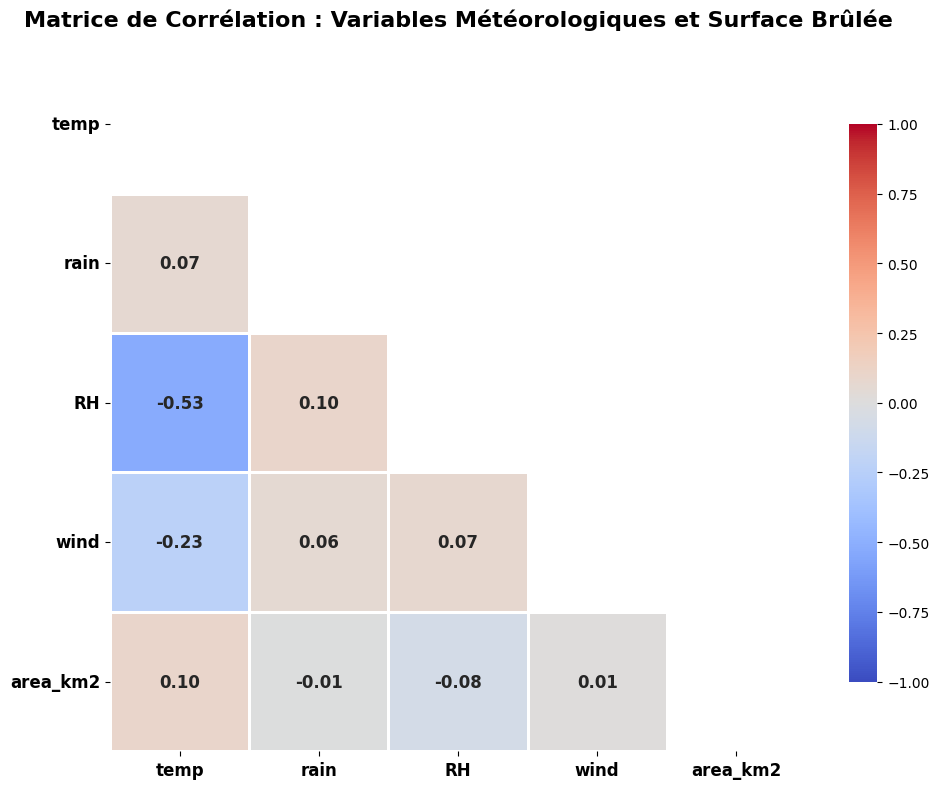

In [30]:
# Calcul de la matrice de corrélation
corr_matrix = df_forestfires[['temp', 'rain', 'RH', 'wind', 'area_km2']].corr()

# Création du masque pour afficher uniquement le triangle inférieur
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Configuration du graphique
plt.figure(figsize=(10, 8))

# Création de la heatmap avec masque
sns.heatmap(
    corr_matrix,
    mask=mask,  # appliquer le masque
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    annot_kws={'size': 12, 'weight': 'bold'},
    linewidths=1,
    vmin=-1, vmax=1,
    cbar_kws={"shrink": .8}  # Barre de couleur légèrement réduite
)

# Titre et labels
plt.title('Matrice de Corrélation : Variables Météorologiques et Surface Brûlée',
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold', rotation=0)

# Ajustement automatique des marges
plt.tight_layout()

# Sauvegarder le graphique
plt.savefig('matrice_correlation_heatmap_triangle_inf.png', dpi=300, bbox_inches='tight')

# Afficher le graphique
plt.show()

**Interprétation**


L'humidité relative (RH) est la variable météorologique qui montre la corrélation la plus notable (négative) avec la surface brûlée, bien que cette corrélation reste faible.

Les autres variables météorologiques (température, pluie, vent) ont des corrélations très faibles voire négligeables avec la surface brûlée dans cette analyse.

Il est important de noter que corrélation n'implique pas causalité.
 Cette matrice montre les relations linéaires entre les variables, mais d'autres facteurs non inclus ici pourraient jouer un rôle important dans la surface brûlée (par exemple, le type de végétation, l'activité humaine, etc.).
Les variables météorologiques entre elles montrent des corrélations attendues, comme la corrélation négative entre la température et l'humidité relative.

## 3.6) Relation entre l'humidité relative et la surface brûlée



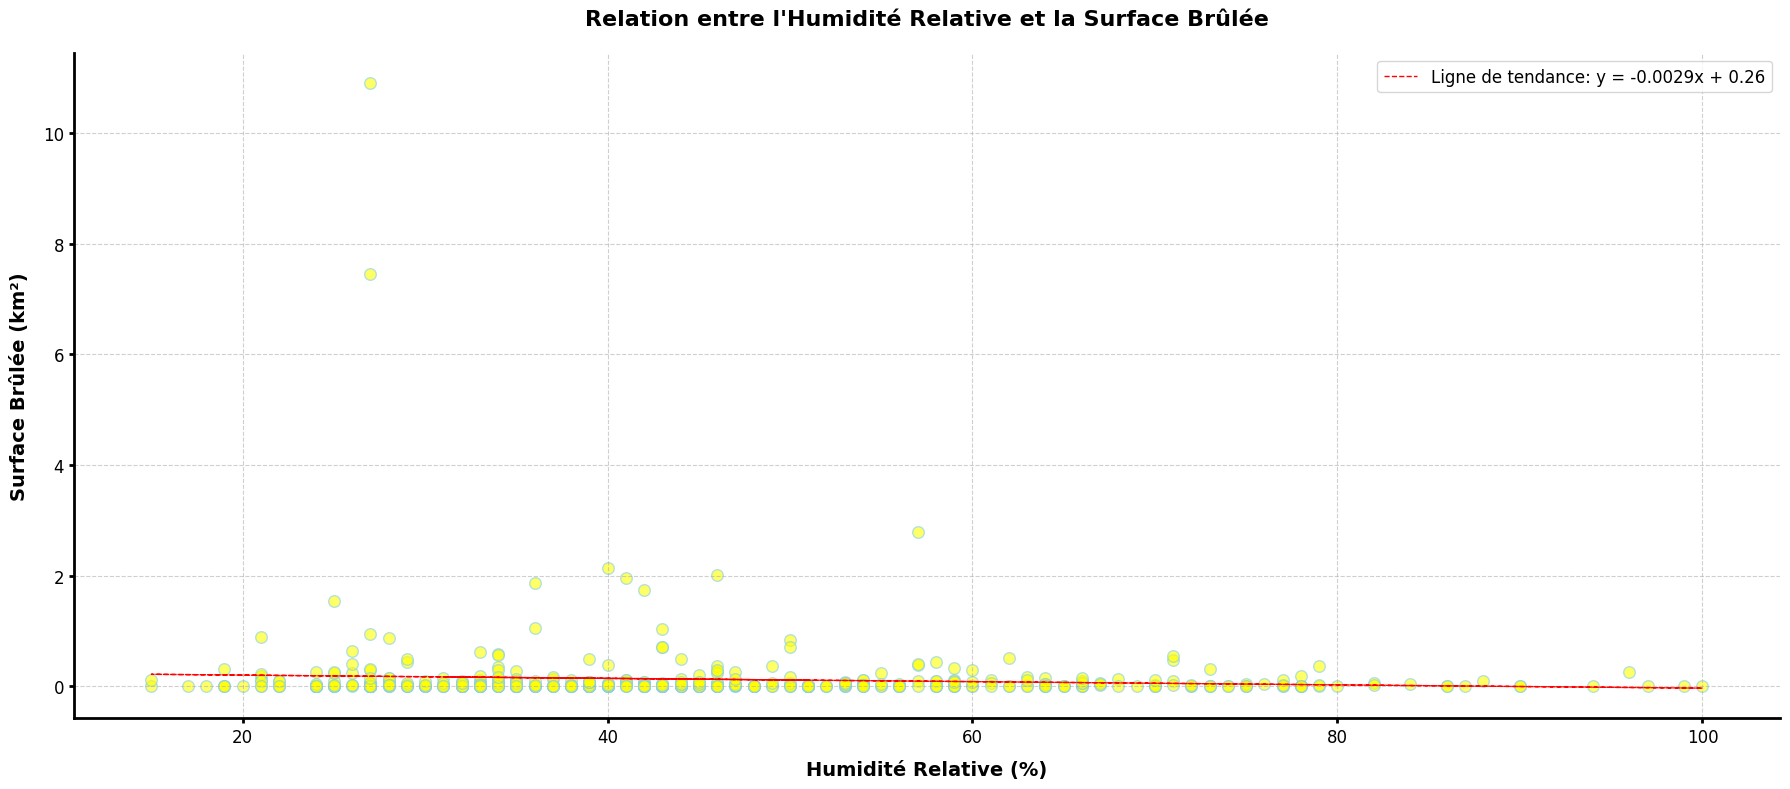

In [31]:
plt.figure(figsize=(18, 8))  # Taille du graphique

# Scatter plot avec transparence et couleur personnalisée
plt.scatter(
    df_forestfires['RH'], df_forestfires['area_km2'],
    alpha=0.6,  # Transparence des points
    color='yellow',  # Couleur des points
    edgecolors='skyblue',  # Contours
    s=70  # Taille des points
)

# Ajouter une ligne de tendance (linéaire)
z = np.polyfit(df_forestfires['RH'], df_forestfires['area_km2'], 1)  # 1 pour un polynôme de degré 1 (droite)
p = np.poly1d(z)
plt.plot(
    df_forestfires['RH'], p(df_forestfires['RH']),
    color='red',  # Couleur de la ligne
    linestyle='--',  # Style de la ligne (pointillé)
    linewidth=1,  # Épaisseur de la ligne
    label=f'Ligne de tendance: y = {z[0]:.4f}x + {z[1]:.2f}'  # Équation de la droite
)

# Titre et labels
plt.title('Relation entre l\'Humidité Relative et la Surface Brûlée', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Humidité Relative (%)', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Surface Brûlée (km²)', fontsize=14, fontweight='bold', labelpad=10)

# Ajouter une légende
plt.legend(fontsize=12, loc='upper right')  # Position et style de la légende

# Ajouter une grille
plt.grid(True, linestyle='--', alpha=0.6)

# Sauvegarder le graphique avant de l'afficher
plt.savefig('relation_humidite_surface_brulée.png', dpi=300, bbox_inches='tight')

# Récupérer les axes actuels
ax = plt.gca()

# Désactiver les bordures supérieures et droites
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Activer et colorer en noir les axes X et Y
ax.spines['left'].set_visible(True)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(2)

ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(2)

# Optionnel : Personnaliser les ticks pour plus de lisibilité
ax.tick_params(axis='x', colors='black', width=2, labelsize=12)
ax.tick_params(axis='y', colors='black', width=2, labelsize=12)

# Afficher le graphique
plt.tight_layout()
plt.show()

**Interprétation**

Si l'humidité relative est élevée, on a tendance à observer une surface brûlée moins importante

# **4. Gestion de la base de données PostgreSQL**



## 4.1) Création de la base donnée





In [32]:
# Définition des constantes pour la connexion à la base de données
DBNAME = "forest_fires"
USER = "postgres"
PASSWORD = "admin"

def create_db_and_table_fires(dbname, user, password):
    try:
        # Connexion à la base de données 
        conn = psycopg2.connect(dbname="postgres", user=user, password=password)
        conn.autocommit = True  # mode autocommit : applique immédiatement les modifications
        cur = conn.cursor()  # Crée un curseur pour exécuter des requêtes SQL

        # Vérifie si la base de données existe 
        cur.execute(f"SELECT 1 FROM pg_database WHERE datname='{dbname}'")
        db_exists = cur.fetchone()
        if not db_exists:
            # Sinon , la créer
            cur.execute(f"CREATE DATABASE {dbname};")
            print(f"La base de données '{dbname}' a bien été créée.")
        else:
            print(f"La base de données '{dbname}' existe déjà.")
        conn.close()  

        # Connexion
        conn = psycopg2.connect(dbname=dbname, user=user, password=password)
        cur = conn.cursor()  

        # Vérifie si la table 'fires' existe 
        cur.execute("SELECT EXISTS (SELECT 1 FROM information_schema.tables WHERE table_name = 'fires');")
        table_exists = cur.fetchone()[0]
        if not table_exists:
            cur.execute("""
                CREATE TABLE fires (
                    id SERIAL PRIMARY KEY,
                    month VARCHAR(10),
                    day VARCHAR(10),
                    X INT,
                    Y INT,
                    temp FLOAT,
                    rain FLOAT,
                    RH FLOAT,
                    wind FLOAT,
                    area_km2 FLOAT,
                    season VARCHAR(10)
                );
            """)
            conn.commit()  
            print("La table 'fires' a été créée avec succès.")
        else:
            print("Table 'fires' existe déjà.")
        conn.close() 

    except psycopg2.Error as e:
        print(f"Error creating database or table: {e}")

create_db_and_table_fires(DBNAME, USER, PASSWORD)


La base de données 'forest_fires' existe déjà.
Table 'fires' existe déjà.




## 4.2) Alimentation de la base donnée



In [33]:

def insert_table_fires(dbname, user, password, df_forestfires):
    try:
        # Connexion
        conn = psycopg2.connect(dbname=dbname, user=user, password=password)
        cur = conn.cursor() 

        # Itération sur chaque ligne du df_forestfires
        for index, row in df_forestfires.iterrows():
            try:
                # Insertion des données de chaque ligne dans la table `fires`
                cur.execute("""
                    INSERT INTO fires (month, day, X, Y, temp, rain, RH, wind, area_km2, season)
                    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
                """, (
                    row['month'], row['day'], row['X'], row['Y'], row['temp'],
                    row['rain'], row['RH'], row['wind'], row['area_km2'], row['season']
                ))
            except Exception as e:
                print(f"Error inserting row {index}: {e}")
                conn.rollback()  # Annule la transaction en cours
                raise  # Relève l'exception pour arrêter l'insertion

        # Valide toutes les insertions effectuées
        conn.commit()
        print("Données insérées avec succès.")

    except psycopg2.Error as e:
        print(f"erreurs de connexion ou d'exécution de requêtes SQL: {e}")
    except Exception as e:
        print(f"Une erreur inattendue est survenue : {e}")
    finally:
        if conn:
            conn.close()


insert_table_fires(DBNAME, USER, PASSWORD, df_forestfires)


Données insérées avec succès.




## 4.3) Fonction requêtage



In [36]:
def execute_query(query, dbname, user, password):
    try:
        conn = psycopg2.connect(dbname=dbname, user=user, password=password)
        cur = conn.cursor() 

        # Exécution de la requête SQL passée en paramètre
        cur.execute(query)

        # Récupération des noms des colonnes
        column_names = [desc[0] for desc in cur.description]

        # Récupération de toutes les lignes résultantes de la requête
        rows = cur.fetchall()

        print(f"\n=== Résultats de la requête ===\n")

        # Affichage des résultats avec les intitulés des colonnes
        for row in rows:
            # Création d'un dictionnaire pour associer chaque colonne à sa valeur
            row_dict = dict(zip(column_names, row))
            for key, value in row_dict.items():
                print(f"{key} : {value}")
            print("-" * 40)  
        conn.close()

    except psycopg2.Error as e:
        print(f"Erreur lors de l'exécution de la requête : {e}")



## 4.4) Quelques requêtes

In [39]:
query_aire_moyenne_mensuelle = """
    SELECT month, AVG(area_km2) AS aire_moyenne_brulée
    FROM fires
    GROUP BY month
    ORDER BY aire_moyenne_brulée DESC;
"""
execute_query(query_aire_moyenne_mensuelle, DBNAME, USER, PASSWORD)



=== Résultats de la requête ===

month : may
aire_moyenne_brulée : 0.1924
----------------------------------------
month : sep
aire_moyenne_brulée : 0.17942616279069762
----------------------------------------
month : jul
aire_moyenne_brulée : 0.143696875
----------------------------------------
month : dec
aire_moyenne_brulée : 0.13330000000000003
----------------------------------------
month : aug
aire_moyenne_brulée : 0.12626318681318682
----------------------------------------
month : apr
aire_moyenne_brulée : 0.08891111111111111
----------------------------------------
month : oct
aire_moyenne_brulée : 0.06638000000000001
----------------------------------------
month : feb
aire_moyenne_brulée : 0.06275000000000001
----------------------------------------
month : jun
aire_moyenne_brulée : 0.0620625
----------------------------------------
month : mar
aire_moyenne_brulée : 0.0389811320754717
----------------------------------------
month : jan
aire_moyenne_brulée : 0.0
----------

In [ ]:
requete_mois_plus_incendies = """
    SELECT month AS mois, SUM(area_km2) AS superficie_totale_brulée
    FROM fires
    GROUP BY mois
    ORDER BY superficie_totale_brulée DESC
    LIMIT 5;
"""
execute_query(requete_mois_plus_incendies, DBNAME, USER, PASSWORD)



=== Résultats de la requête ===

mois : sep
superficie_totale_brulée : 30.86129999999999
----------------------------------------
mois : aug
superficie_totale_brulée : 22.9799
----------------------------------------
mois : jul
superficie_totale_brulée : 4.5983
----------------------------------------
mois : mar
superficie_totale_brulée : 2.0660000000000003
----------------------------------------
mois : feb
superficie_totale_brulée : 1.2550000000000003
----------------------------------------


In [41]:

requete_pourcentage_incendies_saison = """
    SELECT season AS saison, COUNT(*) * 100.0 / (SELECT COUNT(*) FROM fires) AS pourcentage_incendies
    FROM fires
    GROUP BY saison
    ORDER BY pourcentage_incendies DESC;
"""
execute_query(requete_mois_plus_incendies, DBNAME, USER, PASSWORD)



=== Résultats de la requête ===

mois : sep
superficie_totale_brulée : 30.86129999999999
----------------------------------------
mois : aug
superficie_totale_brulée : 22.9799
----------------------------------------
mois : jul
superficie_totale_brulée : 4.5983
----------------------------------------
mois : mar
superficie_totale_brulée : 2.0660000000000003
----------------------------------------
mois : feb
superficie_totale_brulée : 1.2550000000000003
----------------------------------------


In [42]:
requete_coordonnees_plus_touchees = """
    SELECT X AS coordonnée_X, Y AS coordonnée_Y, COUNT(*) AS nombre_incendies, SUM(area_km2) AS superficie_totale_brulée
    FROM fires
    GROUP BY coordonnée_X, coordonnée_Y
    ORDER BY nombre_incendies DESC, superficie_totale_brulée DESC
    LIMIT 10;
"""
execute_query(requete_coordonnees_plus_touchees, DBNAME, USER, PASSWORD)



=== Résultats de la requête ===

coordonnée_x : 8
coordonnée_y : 6
nombre_incendies : 52
superficie_totale_brulée : 12.652999999999999
----------------------------------------
coordonnée_x : 6
coordonnée_y : 5
nombre_incendies : 49
superficie_totale_brulée : 13.8405
----------------------------------------
coordonnée_x : 7
coordonnée_y : 4
nombre_incendies : 45
superficie_totale_brulée : 4.7437000000000005
----------------------------------------
coordonnée_x : 3
coordonnée_y : 4
nombre_incendies : 42
superficie_totale_brulée : 1.2635000000000003
----------------------------------------
coordonnée_x : 4
coordonnée_y : 4
nombre_incendies : 35
superficie_totale_brulée : 3.6877
----------------------------------------
coordonnée_x : 2
coordonnée_y : 4
nombre_incendies : 27
superficie_totale_brulée : 1.4337
----------------------------------------
coordonnée_x : 2
coordonnée_y : 2
nombre_incendies : 25
superficie_totale_brulée : 4.626499999999999
----------------------------------------
c

In [43]:
requete_jours_plus_pluvieux = """
    SELECT month AS mois, day AS jour, rain AS pluie
    FROM fires
    WHERE rain > 0
    ORDER BY rain DESC
    LIMIT 5;
"""
execute_query(requete_jours_plus_pluvieux, DBNAME, USER, PASSWORD)



=== Résultats de la requête ===

mois : aug
jour : tue
pluie : 6.4
----------------------------------------
mois : aug
jour : fri
pluie : 1.4
----------------------------------------
mois : aug
jour : sun
pluie : 1.0
----------------------------------------
mois : aug
jour : tue
pluie : 0.8
----------------------------------------
mois : aug
jour : tue
pluie : 0.8
----------------------------------------


In [45]:
# Requête pour identifier les 10 jours avec le plus d'incendies,
# ainsi que l'humidité relative moyenne ces jours-là, triés par nombre d'incendies décroissant
requete_jours_plus_incendies_humidite = """
    SELECT month AS mois, day AS jour, COUNT(*) AS nombre_incendies, AVG(RH) AS humidité_relative_moyenne
    FROM fires
    GROUP BY mois, jour
    ORDER BY nombre_incendies DESC
    LIMIT 10;
"""
execute_query(requete_jours_plus_incendies_humidite, DBNAME, USER, PASSWORD)




=== Résultats de la requête ===

mois : aug
jour : sun
nombre_incendies : 39
humidité_relative_moyenne : 48.205128205128204
----------------------------------------
mois : sep
jour : fri
nombre_incendies : 38
humidité_relative_moyenne : 46.31578947368421
----------------------------------------
mois : aug
jour : sat
nombre_incendies : 29
humidité_relative_moyenne : 48.0
----------------------------------------
mois : sep
jour : mon
nombre_incendies : 28
humidité_relative_moyenne : 48.857142857142854
----------------------------------------
mois : aug
jour : tue
nombre_incendies : 28
humidité_relative_moyenne : 46.25
----------------------------------------
mois : sep
jour : sun
nombre_incendies : 27
humidité_relative_moyenne : 48.0
----------------------------------------
mois : aug
jour : thu
nombre_incendies : 26
humidité_relative_moyenne : 42.53846153846154
----------------------------------------
mois : sep
jour : sat
nombre_incendies : 25
humidité_relative_moyenne : 37.84
-------